In [12]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
from datetime import datetime 
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [13]:
files=['Sales_April_2019.txt','Sales_August_2019.txt','Sales_October_2019.txt','Sales_December_2019.txt','Sales_February_2019.txt','Sales_January_2019.txt','Sales_July_2019.txt','Sales_June_2019.txt','Sales_March_2019.txt','Sales_May_2019.txt','Sales_November_2019.txt','Sales_September_2019.txt']
df_list=[]

for file in files:
    df = pd.read_csv(file)
    df_list.append(df)
df=pd.concat(df_list,ignore_index=True,axis=0)

### Column headers kept repeating so I have to go through and take them out

In [14]:
df=df[df['Order Date'].str[0:2]!='Or']
df.to_csv('all_data.csv', index=False)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


df.dropna(inplace=True)
df

In [16]:
df['Month'] = df['Order Date'].str[0:2]
print(df['Month'].max())
pd.to_datetime(df['Month'], format='%m')

12


0        1900-04-01
2        1900-04-01
3        1900-04-01
4        1900-04-01
5        1900-04-01
            ...    
186845   1900-09-01
186846   1900-09-01
186847   1900-09-01
186848   1900-09-01
186849   1900-09-01
Name: Month, Length: 185950, dtype: datetime64[ns]

## Converting columns to ints and floats

In [17]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

## Creating a sales column

In [19]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

print(df.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address Month   Sales  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04   23.90  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04   99.99  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  600.00  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04   11.99  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04   11.99  


# Which month had the best sales?

In [20]:
print(df.groupby('Month').sum()['Sales'])

Month
01    1.822257e+06
02    2.202022e+06
03    2.807100e+06
04    3.390670e+06
05    3.152607e+06
06    2.577802e+06
07    2.647776e+06
08    2.244468e+06
09    2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64


## Even from here it's clear that it was December but I'll put it in a graph so it's clearer

In [22]:
results = df.groupby('Month').sum()['Sales']
months=range(1,13)

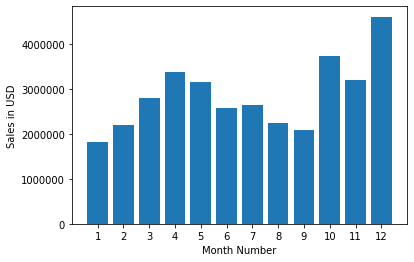

In [23]:
plt.bar(months,results)
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')
plt.show()

## Easy to see that December by far is the best month which is a shocker to no one since it's the month of Christmas. One thing that was shocking to me was that October beat November, and this was shocking since November includes Black Friday and Cyber Monday. January is the worst month, probably due to everyone spending so much in December.

# Which City had the Best Sales

In [24]:
df_temp=df['Purchase Address'].str.split(", ",n=2,expand=True)
df_state=df_temp[2].str.split(" ",n=1,expand=True)

### To protect against cities in different states with same names I'll put the state with the city

In [25]:
df['City']=df_temp[1]+' '+df_state[0]
print(df['City'])

0                Dallas TX
2                Boston MA
3           Los Angeles CA
4           Los Angeles CA
5           Los Angeles CA
                ...       
186845      Los Angeles CA
186846    San Francisco CA
186847    San Francisco CA
186848    San Francisco CA
186849    San Francisco CA
Name: City, Length: 185950, dtype: object


In [26]:
cities = [city for city, df in df.groupby('City')]
results=df.groupby('City').sum()['Sales']
print(results)

City
Atlanta GA          2.795499e+06
Austin TX           1.819582e+06
Boston MA           3.661642e+06
Dallas TX           2.767975e+06
Los Angeles CA      5.452571e+06
New York City NY    4.664317e+06
Portland ME         4.497583e+05
Portland OR         1.870732e+06
San Francisco CA    8.262204e+06
Seattle WA          2.747755e+06
Name: Sales, dtype: float64


## San Fransico was the best city for this store and it wasn't even close.

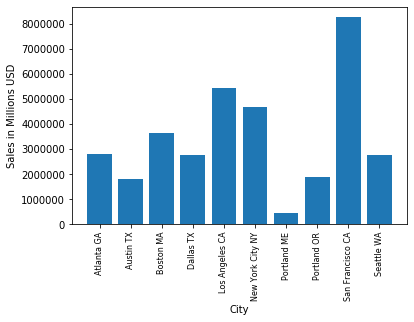

In [27]:
plt.bar(cities,results)
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in Millions USD')
plt.xlabel('City')
plt.show()

## Rather this store needs to pull out of Portland Maine or they need better marketing.

# What is the best time to display advertisements

### Set up hour column

In [28]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Hour']=df['Order Date'].dt.hour

In [29]:
results=df.groupby('Hour').sum()['Sales']
print(results)

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64


## A lot of numbers here but it looks like 7pm is the best time to advertise.

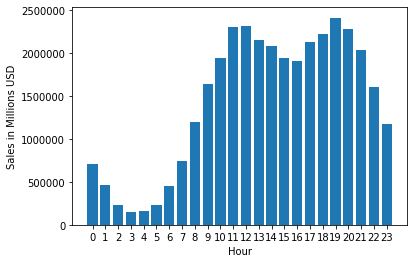

In [30]:
hours = [hour for hour, df in df.groupby('Hour')]
hour=range(1,25)
plt.bar(hours,results)
plt.xticks(hours)
plt.ylabel('Sales in Millions USD')
plt.xlabel('Hour')
plt.show()

## Honestly looking at the graph anytime from 11am to 9pm is prime ad time, with an hour before and after generating decent results. 

## What products are bought together?

In [31]:
df_dup=df[df['Order ID'].duplicated(keep=False)]
df_dup['Grouped']=df_dup.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df_dup=df_dup[['Order ID', 'Grouped']].drop_duplicates()
print(df_dup.head())

    Order ID                                            Grouped
3     176560                      Google Phone,Wired Headphones
18    176574                  Google Phone,USB-C Charging Cable
30    176585  Bose SoundSport Headphones,Bose SoundSport Hea...
32    176586                AAA Batteries (4-pack),Google Phone
119   176672      Lightning Charging Cable,USB-C Charging Cable


In [95]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles CA,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco CA,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco CA,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco CA,17


### Trying to get a sublist that counts objects together

In [45]:
count=Counter()
for row in df_dup['Grouped']:
    row_list=row.split(',')
    #Can change the last digit to 3 or 4 to see most common 3 or 4 bought together :)
    count.update(Counter(combinations(row_list,2)))
    
print(count.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


In [47]:
combos=count.most_common(10)

In [48]:
combos

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

## So the Iphone and Charging cable are most frequently bought together. No surprise there since if you have a phone you need a way to charge it.

# What product sold the most

In [80]:
product=[product for product, df in df.groupby('Product')]
results=df.groupby('Product').sum()['Quantity Ordered']

print(results)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32


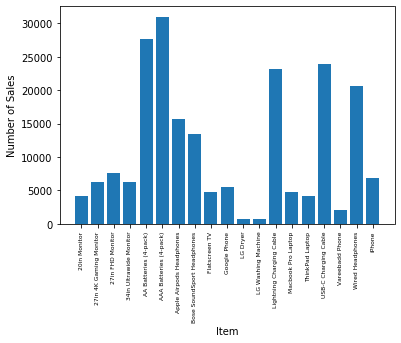

In [83]:
plt.bar(product,results)
plt.xticks(product,rotation='vertical',size=6)
plt.ylabel('Number of Sales')
plt.xlabel('Item')
plt.show()

## Batteries are the clear winner here with charging cables and headphones coming close. If I had to guess I had wager that this is due to price. Expensive items like dryers are sold way less often than batteries. Another reason would be that you need to replace batteries much more often than a dryer.

In [101]:
price_each=df.groupby('Product').mean()['Price Each']
price_each

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

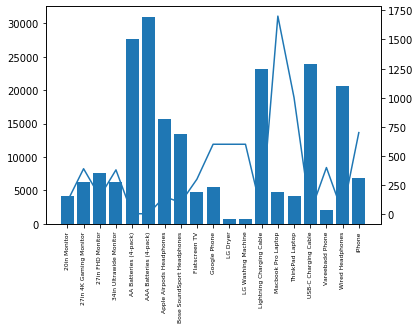

In [102]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(product,results)
ax1.axes.set_xticklabels(product,rotation='vertical',size=6)
ax2.plot(price_each)
plt.show()

## Looking here there is some truth to the price aspect. As the batteries are the cheapest and they sell the most, same with the chargers/headphones. But iphones sell more than a gaming monitor, so I think demand has to do more with number of sales than price.